(scheme:leapfrog)=
# The Leapfrog Scheme

The leapfrog scheme is obtained by replacing the time and space derivatives of {eq}`eqAdvection` by centred finite differences. After discretizing time and space in $N$ time steps $t^n$ and $M$ grid positions $x_m$, and substiting the partial derivatives with the finite difference approximations, we obtain:

$$
   u_{m}^{n+1} = u_{m}^{n-1} - c\frac{\Delta t}{\Delta x}(u_{m+1}^{n}-u_{m-1}^{n})
$$ (eqLeapfrog)

where $u_{m}^{n} = u(x=x_m,t=t^n)$ is the function value at grid position $m$ and at time step $n$. The increments $\Delta t$ and $\Delta x$ are the time step and grid step (resolution), respectively.

## Consistency, stability and convergence
The scheme truncation error is $O(\Delta t^2,\Delta x^2)$. It is conditionally stable with the stability condition being $c\frac{\Delta t}{\Delta x} \leq 1$. 

```{figure} Leapfrog_Domain.png
---
height: 600px
name: leapfrogDomain
---
Domain of influence of the Leapfrog scheme. 
```

The characteristic lines in {numref}`leapfrogDomain` have a slope of $1/c$, while the sides of the triangle have a slope of $\Delta t/\Delta x$. 

The solution $u(c_m,t^n)$ is constant along the characteristic that passes through the point. 
For the scheme to provide meaningful results, the characteristic line must be inside the domain of the scheme, which is only possible if the slope of the characteristic is larger than the slope of the triangle sides. This is true if:

$$
	\frac{1}{c} \ge \frac{\Delta t}{\Delta x} \Leftrightarrow c\frac{\Delta t}{\Delta x} \leq 1.
$$

(tophat:leapfrog)=
## Application: propagation of top hat function

To test the scheme, we are going to apply it to the propagation of the top hat signal. The spatial domain is defined as $x \in \left[0,1\right]$, with periodic boundary conditions.

The top hat signal is defined by this code snippet and is shown for $t=0$ in :

In [1]:
def topHat(x):
   f0=np.zeros(x.shape)
   f0[(x>0.45) & (x<0.55)]=1

   return f0

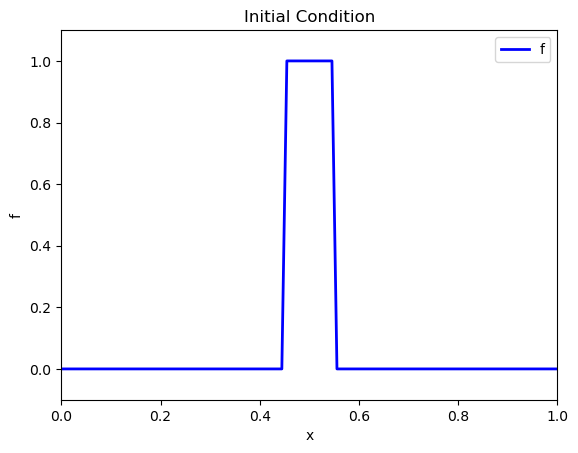

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Nx=100
X=np.linspace(0,1,Nx)

fig, ax0 = plt.subplots()
ax0.set_xlim(( 0, 1))
ax0.set_ylim((-0.1, 1.1))

line1, = ax0.plot(X, topHat(X), lw = 2, color = "b",  label='f')

ax0.set_xlabel('x')
ax0.set_ylabel('f')
ax0.set_title("Initial Condition")
ax0.legend()

The Leapfrog scheme is implemented in the following Python function:

In [3]:
def leapfrog(u0,c,dt,dx,N,M):
   
   # Solution array with three time levels
   u=np.zeros((3,M))

   # Store initial condition in time level 0
   u[0,:]=u0

   # CFL number
   C = c*dt/dx

   # First time step with forward euler, since the Leapfrog scheme is a three-time level
   # scheme, and we cannot use it at n=0

   u[1,1:M-1]=u[0,1:M-1]-0.5*C*(u[0,2:M]-u[0,0:M-2])

   # Step with Leapfrog scheme

   for n in range(N-1):
      
      # First grid point
      u[2,0]=u[0,0]-C*(u[1,1]-u[1,M-2])
      
      # Interior points
      u[2,1:M-1]=u[0,1:M-1]-C*(u[1,2:M]-u[1,0:M-2])

      # Last grid point
      u[2,M-1]=u[0,M-1]-C*(u[1,1]-u[1,M-2])

      # Update solution arrays
      u[0,:]=u[1,:]
      u[1,:]=u[2,:]

   return u

In the next code snippet, we set the discretization parameters and integrate the initial condition with the Leapfrog scheme:

In [4]:
N     = 30       # Number of time steps
M     = 100      # Number of space mesh points
c     = 0.75     # Propagation speed

dt = 0.01
dx = 1/M

print("Number of time steps = {:d}".format(N))
print("Number of grid points = {:d}".format(M))
print("Time step = {:f}".format(dt))
print("Grid size = {:f}".format(dx))
print("CFL number = {:f}".format(c*dt/dx))

# Integrate the initial condition N time steps
U=leapfrog(topHat(X),c,dt,dx,N,M)

Number of time steps = 30
Number of grid points = 100
Time step = 0.010000
Grid size = 0.010000
CFL number = 0.750000


The solution at the end of the integration is shown below:

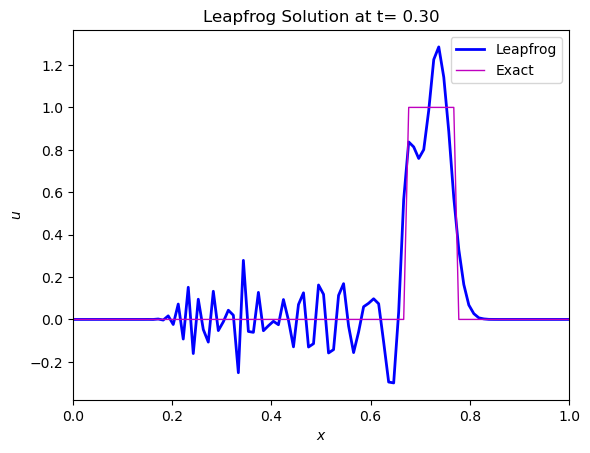

In [5]:
# Shift the exact solution a distance equivalent to c*N*dt
newX = np.mod(X-c*N*dt,1)

fig, ax0 = plt.subplots()

ax0.plot(X, U[2,:], lw = 2, color = "b",  label='Leapfrog')
ax0.plot(X, topHat(newX), lw = 1, color = "m",  label='Exact')

ax0.set_title("Leapfrog Solution at t={:5.2f}".format(N*dt))
ax0.set_xlabel('$x$')
ax0.set_xlim([0, 1])
ax0.set_ylabel('$u$')
ax0.legend()

plt.show()

Observation of the solution allows to conclude that:
1. The numerical solution follows the true solution, but
2. There are wave-like disturbances in the numerical solution.

The wave-like disturbances appear because the Leapfrog scheme is **dispersive**. This occurs whenever the phase speed of wave-like solutions to the *difference equation* depend on their wavelength, as is the case with the Leapfrog scheme.